# Analyse Exploratoire

### Import des modules

In [1215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

### Analyse Exploratoire

In [1216]:
building_consumption = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [1217]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [1218]:
building_consumption.columns.tolist()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

Les deux variables cibles à prédire :

SiteEnergyUseWN(kBtu) = consommation totale d’énergie indépendamment de la météo

TotalGHGEmissions = émissions totales de gaz à effet de serre (en tonnes de CO₂)

In [1219]:
# On vérifie qu'on a bien uniquement l'année 2016 dans les données
building_consumption['DataYear'].unique()

array([2016])

In [1220]:
building_consumption['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

Comme le précise le cahier des charges, le projet porte exclusivement sur les bâtiments non résidentiels.

Nous allons donc filtré la colonne BuildingType pour ne garder que : 
    'NonResidential',
    'Nonresidential COS',
    'Nonresidential WA',
    'SPS-District K-12',
    'Campus'

In [1221]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

Plusieurs colonnes du jeu de données présentaient un taux de valeurs manquantes supérieur à 80 %.
Ces variables (Comments, Outlier, YearsENERGYSTARCertified, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA) seront donc supprimées, car elles ne contiennent pas suffisamment d’informations exploitables pour l’analyse ou la modélisation.

Les autres colonnes partiellement incomplètes ont été conservées pour traitement ultérieur, car elles apportent des informations potentiellement pertinentes (ex. ENERGYSTARScore, SecondLargestPropertyUseType, etc.).

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse : 

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier 

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet. 

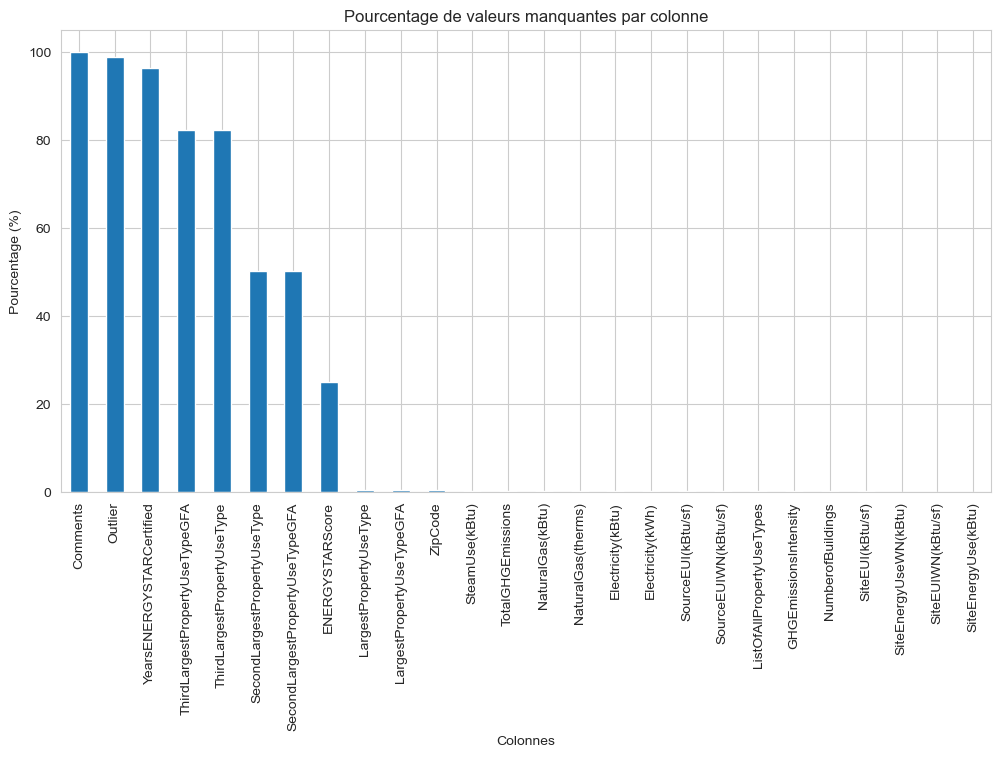

In [1222]:
# On regarde le pourcentage de valeurs manquantes par colonne
missing_percentage = building_consumption.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Pourcentage de valeurs manquantes par colonne')
plt.ylabel('Pourcentage (%)')
plt.xlabel('Colonnes')
plt.show()

Comme dit dans l'analyse exploratoire, nous allons supprimer certaines colonnes car trop de valeurs manquantes

In [1223]:
print('Nombre de colonnes avant suppression :', building_consumption.shape[1])
cols_to_drop = [
    'Comments',
    'YearsENERGYSTARCertified',
    'ThirdLargestPropertyUseType',
    'ThirdLargestPropertyUseTypeGFA'
]
building_consumption.drop(columns=cols_to_drop, inplace=True)
print('Nombre de colonnes après suppression :', building_consumption.shape[1])

Nombre de colonnes avant suppression : 46
Nombre de colonnes après suppression : 42


Maintenant on garde uniquement les structures non résidentiels pour être en accord avec le cahier des charges de la ville

In [1224]:
print('Nombre de lignes avant filtrage :', building_consumption.shape[0])
to_keep = [
    'NonResidential',         # Bâtiments purement non résidentiels (ceux visés par le projet)
    'Nonresidential COS',     # Bâtiments municipaux non résidentiels appartenant à la City of Seattle
    'Nonresidential WA',      # Bâtiments non résidentiels de l'État de Washington
    'SPS-District K-12',      # Écoles publiques (Seattle Public Schools), incluses car non résidentielles
    'Campus'                  # Ensembles de bâtiments à usage collectif (universités, hôpitaux, etc.)
]
building_consumption = building_consumption[building_consumption['BuildingType'].isin(to_keep)]
print('Nombre de lignes après filtrage :', building_consumption.shape[0])


Nombre de lignes avant filtrage : 3376
Nombre de lignes après filtrage : 1668


In [1225]:
# Ici on va voir tous les types d’usage rencontrés dans les Campus
campus_df = building_consumption[building_consumption["BuildingType"].str.lower() == "campus"]

campus_property_types = campus_df["ListOfAllPropertyUseTypes"]

campus_property_types = campus_property_types.dropna()

unique_types = (
    campus_property_types
    .str.split(",")              
    .explode()                   
    .str.strip()                 
    .dropna()
    .unique()
)

print("\nTous les types d’usage rencontrés dans les Campus :")
print(sorted(unique_types))



Tous les types d’usage rencontrés dans les Campus :
['Adult Education', 'Bar/Nightclub', 'College/University', 'Data Center', 'Energy/Power Station', 'Food Sales', 'K-12 School', 'Laboratory', 'Manufacturing/Industrial Plant', 'Multifamily Housing', 'Non-Refrigerated Warehouse', 'Office', 'Other', 'Other - Education', 'Other - Restaurant/Bar', 'Other - Utility', 'Parking', 'Pre-school/Daycare', 'Restaurant', 'Retail Store', 'Self-Storage Facility', 'Social/Meeting Hall', 'Supermarket/Grocery Store']


In [1226]:
# On remarque que certaines lignes contiennent "Multifamily Housing"
print(f"\nNombre de lignes avant suppression des résidentielles : {len(building_consumption)}")
mask_residential = building_consumption["ListOfAllPropertyUseTypes"].str.contains("Multifamily Housing", case=False, na=False)
print(f"Nombre de lignes résidentielles détectées : {mask_residential.sum()}")

building_consumption = building_consumption[~mask_residential].copy()

print(f"après suppression : {len(building_consumption)}")



Nombre de lignes avant suppression des résidentielles : 1668
Nombre de lignes résidentielles détectées : 39
après suppression : 1629


In [1227]:
# Suppression des colonnes qui n'ont qu'une seul valeur unique
nunique = building_consumption.nunique()
cols_single_value = nunique[nunique == 1].index.tolist()
print('Toutes les colonnes avec une seule valeur unique avec leurs valeurs :')
for col in cols_single_value:
    print(f" - {col} : {building_consumption[col].iloc[0]}")
print('Nombre de colonnes avant suppression :', building_consumption.shape[1])
nunique = building_consumption.nunique()
cols_single_value = nunique[nunique == 1].index.tolist()
building_consumption.drop(columns=cols_single_value, inplace=True)
print('Nombre de colonnes après suppression :', building_consumption.shape[1])

Toutes les colonnes avec une seule valeur unique avec leurs valeurs :
 - DataYear : 2016
 - City : Seattle
 - State : WA
Nombre de colonnes avant suppression : 42
Nombre de colonnes après suppression : 39


In [1228]:
print('Nombre de lignes après filtrage :', building_consumption.shape[0])
print('Nombre de colonnes après filtrage :', building_consumption.shape[1])

Nombre de lignes après filtrage : 1629
Nombre de colonnes après filtrage : 39


Je veux distinguer les bâtiments à usage unique de ceux qui ont plusieurs usages car un bâtiment qui héberge plusieurs activités a souvent :

1 / Une surface plus grande,

2 / Une consommation énergétique plus élevée,

3 / Des émissions de CO₂ plus variables.

In [1229]:
# On commence par créer une nouvelle variable IsMultiUse pour faire la distinction entre les bâtiments à usage unique et ceux à usages multiples
# en cherchant la présence d’une virgule ','
building_consumption['IsMultiUse'] = building_consumption['ListOfAllPropertyUseTypes'].apply(lambda x: ',' in str(x))
building_consumption['IsMultiUse'].value_counts()

IsMultiUse
True     818
False    811
Name: count, dtype: int64

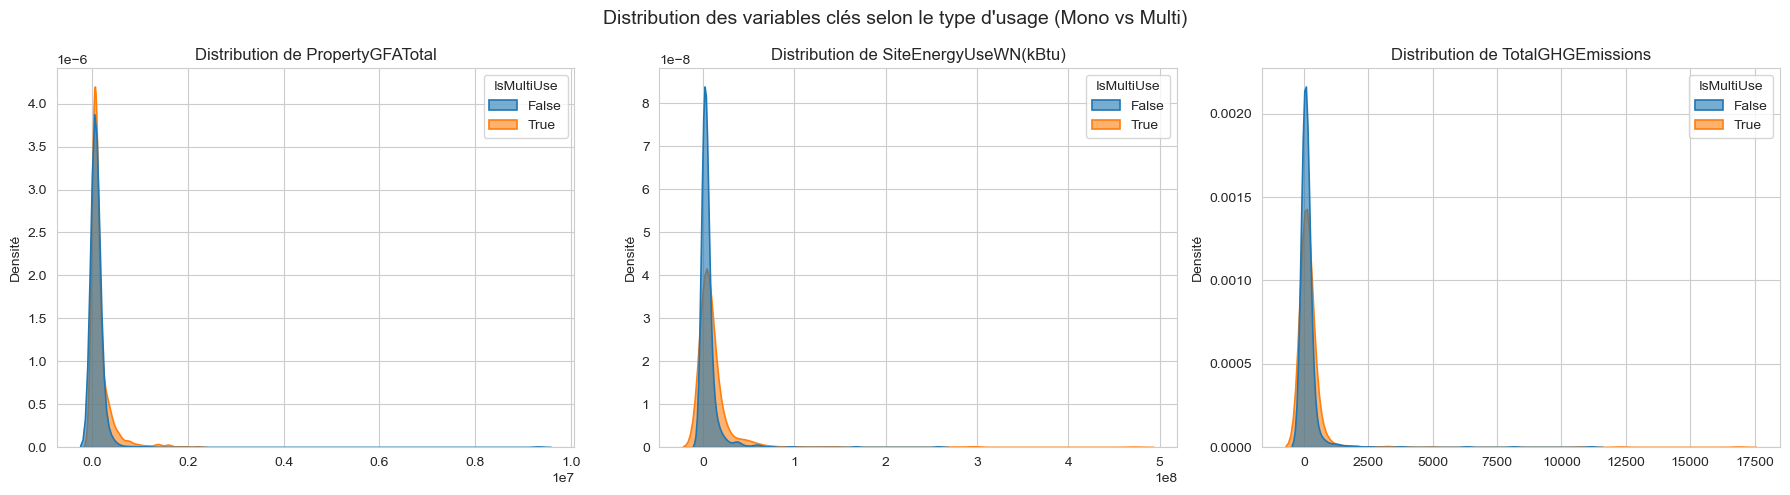

In [1230]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['PropertyGFATotal', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cols):
    sns.kdeplot(
        data=building_consumption,
        x=col,
        hue='IsMultiUse',
        fill=True,
        common_norm=False,
        alpha=0.6,
        linewidth=1.2,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution de {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Densité')

plt.suptitle("Distribution des variables clés selon le type d'usage (Mono vs Multi)", fontsize=14)
plt.tight_layout()
plt.show()


1 / 
Les bâtiments multi-usages sont globalement plus grands que les bâtiments mono-usage.
Cela est logique : combiner plusieurs fonctions (bureaux, parking, commerces…) nécessite davantage d’espace.

2 / 
Les bâtiments multi-usages consomment davantage d’énergie.
Cela s’explique par :
leur plus grande taille,
la diversité des activités hébergées (chauffage, éclairage, froid, informatique, etc.),et une occupation plus continue (plus d’heures d’activité cumulées).

3 / 
Les bâtiments multi-usages sont également plus émetteurs de CO2, ce qui est cohérent avec leur niveau de consommation énergétique.
On retrouve ici le même schéma que pour la variable précédente : taille + diversité = plus d’énergie consommée et donc plus d’émissions.

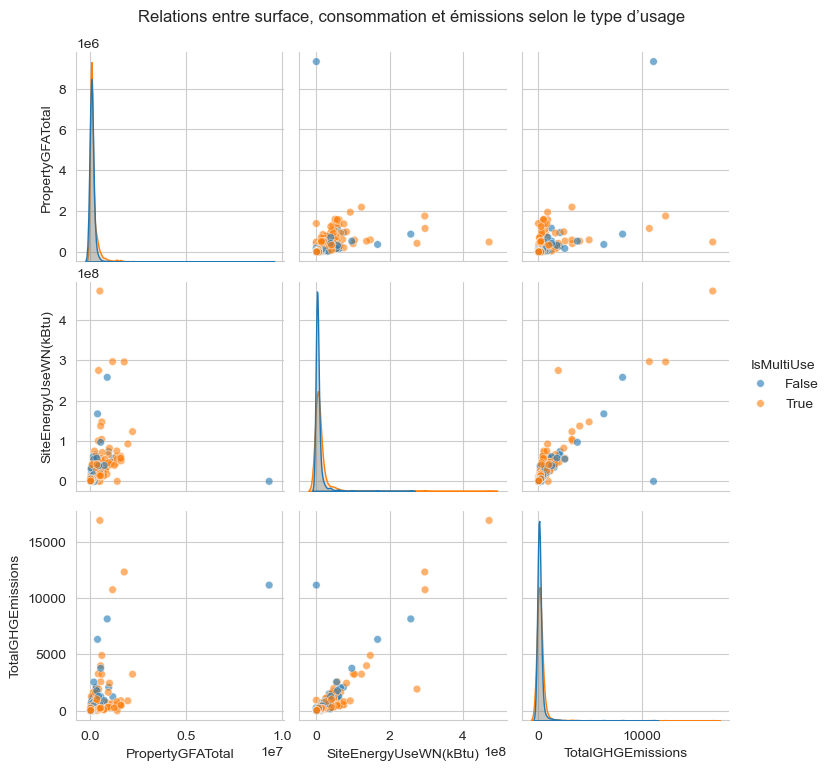

In [1231]:
# On complète avec une pairplot pour visualiser les relations entre les trois variables quantitatives en fonction du type d’usage
sns.pairplot(
    building_consumption,
    vars=['PropertyGFATotal', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'],
    hue='IsMultiUse',
    plot_kws={'alpha':0.6, 's':30}
)
plt.suptitle("Relations entre surface, consommation et émissions selon le type d’usage", y=1.02)
plt.show()


Ce pairplot met en évidence une forte cohérence structurelle entre les variables étudiées :

Les bâtiments les plus vastes sont aussi les plus consommateurs et les plus émetteurs.

Les bâtiments multi-usages (en orange) se distinguent globalement par des valeurs plus élevées sur ces trois axes.

Quelques points isolés traduisent des situations extrêmes mais plausibles (par exemple, hôpitaux ou data centers).

Ces observations confirment que :

la surface totale (PropertyGFATotal) est un prédicteur essentiel,

la variable IsMultiUse est pertinente pour différencier les profils énergétiques,

et les valeurs extrêmes devront être vérifiées mais probablement conservées, car elles traduisent des cas réels importants pour la politique énergétique de la ville.

# Modélisation 

### Import des modules 

In [1232]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

In [1233]:
# === CODE FEATURE ENGINEERING AVANCÉ ===

# 1. Âge du bâtiment
building_consumption['BuildingAge'] = building_consumption['YearBuilt'].apply(lambda x: 2016 - x)

# 1bis. Classe d'âge du bâtiment
# <20 ans, 20-50 ans, >50 ans
def age_class(age):
    if age <= 20:
        return 'recent'
    elif age <= 50:
        return 'middle'
    else:
        return 'old'
building_consumption['BuildingAgeClass'] = building_consumption['BuildingAge'].apply(age_class)

# 2. Présence de parking
building_consumption['HasParking'] = building_consumption['PropertyGFAParking'].apply(lambda x: 1 if x > 0 else 0)

# 2bis. Part du parking dans le bâtiment
building_consumption['ParkingRatio'] = building_consumption.apply(
    lambda row: row['PropertyGFAParking'] / row['PropertyGFATotal']
    if row['PropertyGFATotal'] > 0 else 0,
    axis=1
)

# 3. Taille du bâtiment
median_area = building_consumption['PropertyGFATotal'].median()
building_consumption['IsLargeBuilding'] = building_consumption['PropertyGFATotal'].apply(
    lambda x: 1 if x > median_area else 0
)

# 3bis. Surface moyenne par étage
building_consumption['AvgFloorArea'] = building_consumption.apply(
    lambda row: row['PropertyGFATotal'] / row['NumberofFloors']
    if row['NumberofFloors'] > 0 else np.nan,
    axis=1
)

# 3ter. Volume approximatif du bâtiment
building_consumption['ApproxBuildingVolume'] = building_consumption['PropertyGFATotal'] * building_consumption['NumberofFloors']

# 4. Complexité d'usage
building_consumption['UseTypeCount'] = building_consumption['ListOfAllPropertyUseTypes'].apply(
    lambda x: len(str(x).split(',')) if pd.notnull(x) else 0
)

# 4bis. Bâtiment à usage multiple
# Multi-usage = plus de 1 type déclaré
building_consumption['IsMultiUse'] = building_consumption['UseTypeCount'].apply(lambda n: 1 if n > 1 else 0)

# 5. Intensité énergétique
building_consumption['EnergyIntensity'] = building_consumption.apply(
    lambda row: row['SiteEnergyUseWN(kBtu)'] / row['PropertyGFATotal']
    if row['PropertyGFATotal'] > 0 else np.nan,
    axis=1
)

# 5bis. Intensité d'émissions
building_consumption['EmissionsIntensity'] = building_consumption.apply(
    lambda row: row['TotalGHGEmissions'] / row['PropertyGFATotal']
    if row['PropertyGFATotal'] > 0 else np.nan,
    axis=1
)

# 6. Ratio Gaz / Énergie totale
building_consumption['GasShare'] = building_consumption.apply(
    lambda row: row['NaturalGas(kBtu)'] / row['SiteEnergyUseWN(kBtu)']
    if row['SiteEnergyUseWN(kBtu)'] > 0 else 0,
    axis=1
)

# 7. Ratio Électricité / Énergie totale
building_consumption['ElectricShare'] = building_consumption.apply(
    lambda row: row['Electricity(kBtu)'] / row['SiteEnergyUseWN(kBtu)']
    if row['SiteEnergyUseWN(kBtu)'] > 0 else 0,
    axis=1
)

# 8. Efficacité énergétique déclarée
building_consumption['InefficiencyScore'] = building_consumption['ENERGYSTARScore'].apply(
    lambda x: 100 - x if pd.notnull(x) else np.nan
)

# 9. Bâtiment ancien
building_consumption['IsOldBuilding'] = building_consumption['BuildingAge'].apply(
    lambda x: 1 if x > 50 else 0
)

# 10.Distance au centre-ville de Seattle
# Centre géographique approx de Seattle : lat=47.6062, lon=-122.3321
CENTER_LAT, CENTER_LON = 47.6062, -122.3321

def haversine_distance(lat, lon, ref_lat=CENTER_LAT, ref_lon=CENTER_LON):
    R = 6371  # km
    dlat = np.radians(lat - ref_lat)
    dlon = np.radians(lon - ref_lon)
    a = (
        np.sin(dlat / 2) ** 2
        + np.cos(np.radians(ref_lat))
        * np.cos(np.radians(lat))
        * np.sin(dlon / 2) ** 2
    )
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

building_consumption['DistanceFromCenter_km'] = building_consumption.apply(
    lambda row: haversine_distance(row['Latitude'], row['Longitude']),
    axis=1
)

# Nettoyage final des infinis / NaN créés par les divisions
building_consumption.replace([np.inf, -np.inf], np.nan, inplace=True)

# Aperçu final
building_consumption.head()


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,AvgFloorArea,ApproxBuildingVolume,UseTypeCount,EnergyIntensity,EmissionsIntensity,GasShare,ElectricShare,InefficiencyScore,IsOldBuilding,DistanceFromCenter_km
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,...,7369.500000,1061208,1,84.321754,0.002827,0.171177,0.529177,40.0,1,0.800050
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,...,9415.090909,1139226,3,83.661424,0.002857,0.593813,0.374270,39.0,0,0.787077
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,...,23319.756098,39200510,1,77.331177,0.002185,0.020204,0.669849,57.0,0,0.970109
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,...,6132.000000,613200,1,113.287679,0.004671,0.260726,0.398590,44.0,1,0.944139
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,...,9754.444444,3160440,3,83.474786,0.002876,0.600689,0.366295,25.0,0,1.048092


Feature Engineering

De nouvelles variables ont été créées afin d’enrichir le jeu de données et de mieux capter les caractéristiques structurelles et énergétiques des bâtiments :

BuildingAge : âge du bâtiment (2016 – année de construction).

IsOldBuilding : indicateur binaire identifiant les bâtiments de plus de 50 ans.

HasParking : détection des bâtiments disposant d’un espace de stationnement.

IsLargeBuilding : identifie les bâtiments dont la surface dépasse la médiane du jeu de données.

IsMultiUse et UseTypeCount : caractérisent la complexité d’usage du bâtiment.

EnergyIntensity : consommation d’énergie par unité de surface (kBtu/ft²).

EmissionsIntensity : émissions de GES par unité de surface.

Ces features permettront au modèle de mieux relier les caractéristiques physiques, structurelles et fonctionnelles des bâtiments à leurs niveaux de consommation énergétique et d’émissions de CO₂.

### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

## 1 / Supprimer toutes les colonnes peu pertinentes pour la modélisation

In [1234]:
print('Nombre de colonnes avant suppression :', building_consumption.shape[1])
cols_to_drop = [
    'OSEBuildingID',                    # Identifiant unique (aucune valeur prédictive)
    'PropertyName',                     # Nom du bâtiment (texte non exploitable)
    'Address',                          # Adresse (texte, unique pour chaque ligne)
    'ZipCode',                          # Code postal : trop granulaire, peu informatif sans encodage spatial
    'TaxParcelIdentificationNumber',    # Identifiant administratif (aucun lien avec la consommation)
    'CouncilDistrictCode',              # Code politique, non pertinent pour la consommation énergétique
    'Neighborhood',                     # Nom de quartier (texte, trop de catégories)
    'DefaultData',                      # Donnée interne au dataset (booléen sans signification métier)
    'ComplianceStatus',                 # Statut administratif (non explicatif)
    'PropertyGFABuilding(s)',           # Redondant avec PropertyGFATotal
    'ListOfAllPropertyUseTypes',        # Déjà résumé par IsMultiUse et UseTypeCount
    'LargestPropertyUseType',           # Texte, redondant avec PrimaryPropertyType
    'SecondLargestPropertyUseType',     # Peu renseigné + redondant
    'SecondLargestPropertyUseTypeGFA'   # Corrélé à LargestPropertyUseTypeGFA et PropertyGFATotal
]

building_consumption = building_consumption.drop(columns=cols_to_drop)
print('Nombre de colonnes après suppression :', building_consumption.shape[1])

Nombre de colonnes avant suppression : 55
Nombre de colonnes après suppression : 41


## 2 / Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.

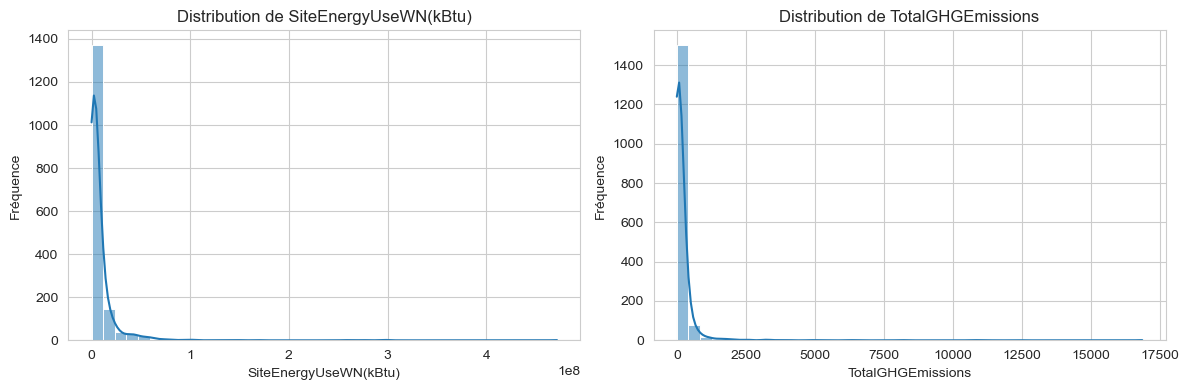

In [1235]:
# Analyse des distributions des variables cibles
targets = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

plt.figure(figsize=(12, 4))

for i, target in enumerate(targets):
    plt.subplot(1, 2, i+1)
    sns.histplot(building_consumption[target], kde=True, bins=40)
    plt.title(f"Distribution de {target}")
    plt.xlabel(target)
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

Pour SiteEnergyUseWN(kBtu) :

Distribution fortement asymétrique à droite.

Quelques bâtiments consomment énormément d’énergie (probablement des hôpitaux, campus, data centers).

Ces valeurs extrêmes ne sont pas forcément fausses, mais elles biaisent les modèles linéaires.

Pour TotalGHGEmissions :

Même schéma : grande majorité avec faibles émissions, quelques bâtiments très polluants.

Corrélée à la consommation, donc même logique.

In [1236]:
# Suppression des outliers basés sur les quantiles 1% et 99%
print('Nombre de lignes avant suppression des outliers :', building_consumption.shape[0])
for target in targets:
    q_low = building_consumption[target].quantile(0.01)
    q_high = building_consumption[target].quantile(0.99)
    building_consumption = building_consumption[
        (building_consumption[target] > q_low) & 
        (building_consumption[target] < q_high)
    ] 
    print(f"Après suppression des outliers pour {target} : {building_consumption.shape[0]} lignes restantes")

Nombre de lignes avant suppression des outliers : 1629
Après suppression des outliers pour SiteEnergyUseWN(kBtu) : 1584 lignes restantes
Après suppression des outliers pour TotalGHGEmissions : 1552 lignes restantes


## 3 / Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 

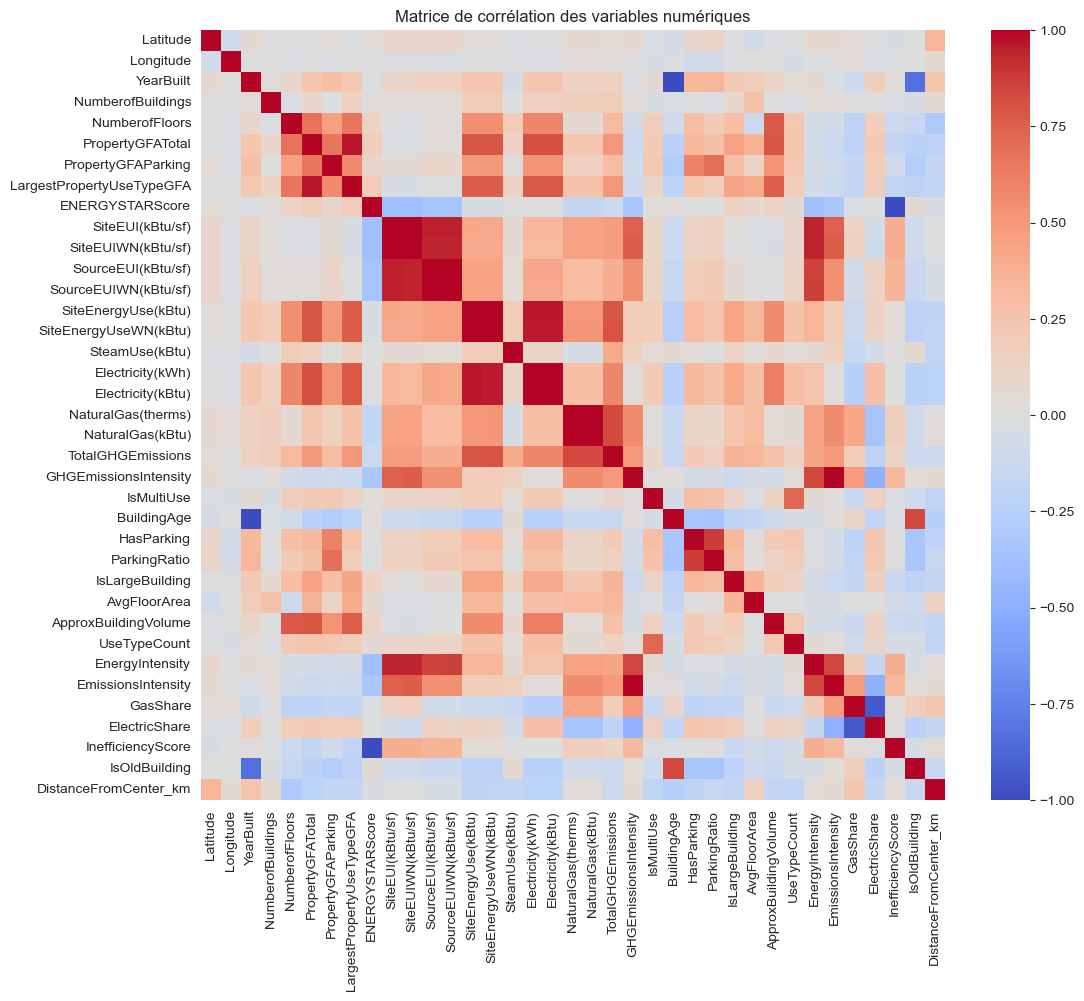

In [1237]:
corr = building_consumption.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

In [1238]:
print('Nombre de colonnes avant suppression des corrélations :', building_consumption.shape[1])
cols_to_drop_corr = [
    'IsLargeBuilding',         # dérivé de PropertyGFATotal
    'HasParking',              # dérivé de PropertyGFAParking
    'IsOldBuilding',           # dérivé de BuildingAge
    'EmissionsIntensity',      # redondant avec EnergyIntensity
    'SiteEUI(kBtu/sf)',        # doublon non normalisé
    'SourceEUI(kBtu/sf)',      # doublon non normalisé
    'SourceEUIWN(kBtu/sf)'     # doublon de SiteEUIWN(kBtu/sf)
]

building_consumption = building_consumption.drop(columns=cols_to_drop_corr)
print('Nombre de colonnes après suppression des corrélations :', building_consumption.shape[1])

Nombre de colonnes avant suppression des corrélations : 41
Nombre de colonnes après suppression des corrélations : 34


## 4 / Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).

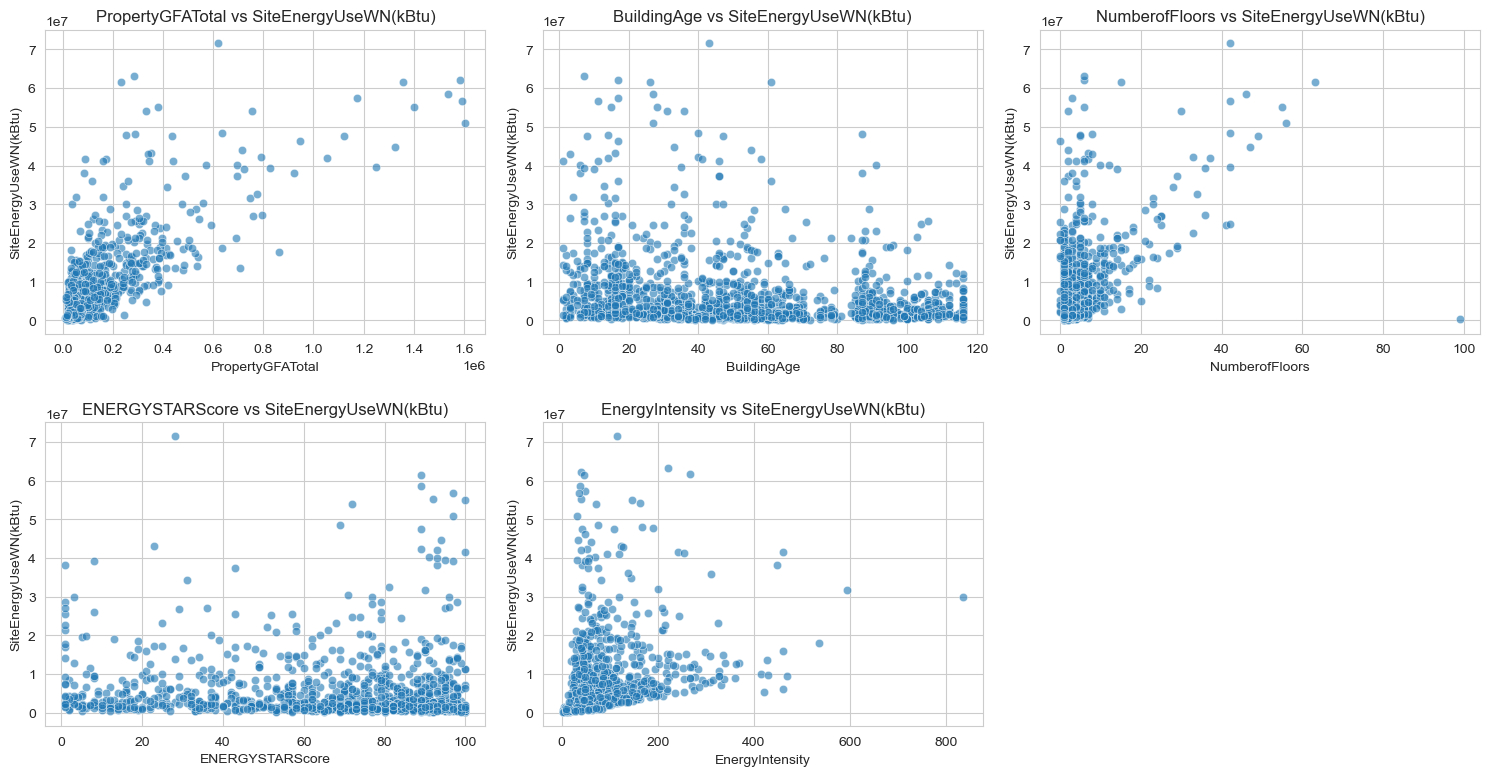

In [1239]:
features_cont = ['PropertyGFATotal', 'BuildingAge', 'NumberofFloors', 'ENERGYSTARScore', 'EnergyIntensity']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_cont):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(
        data=building_consumption,
        x=feature,
        y='SiteEnergyUseWN(kBtu)',
        alpha=0.6
    )
    plt.title(f"{feature} vs SiteEnergyUseWN(kBtu)")
plt.tight_layout()
plt.show()

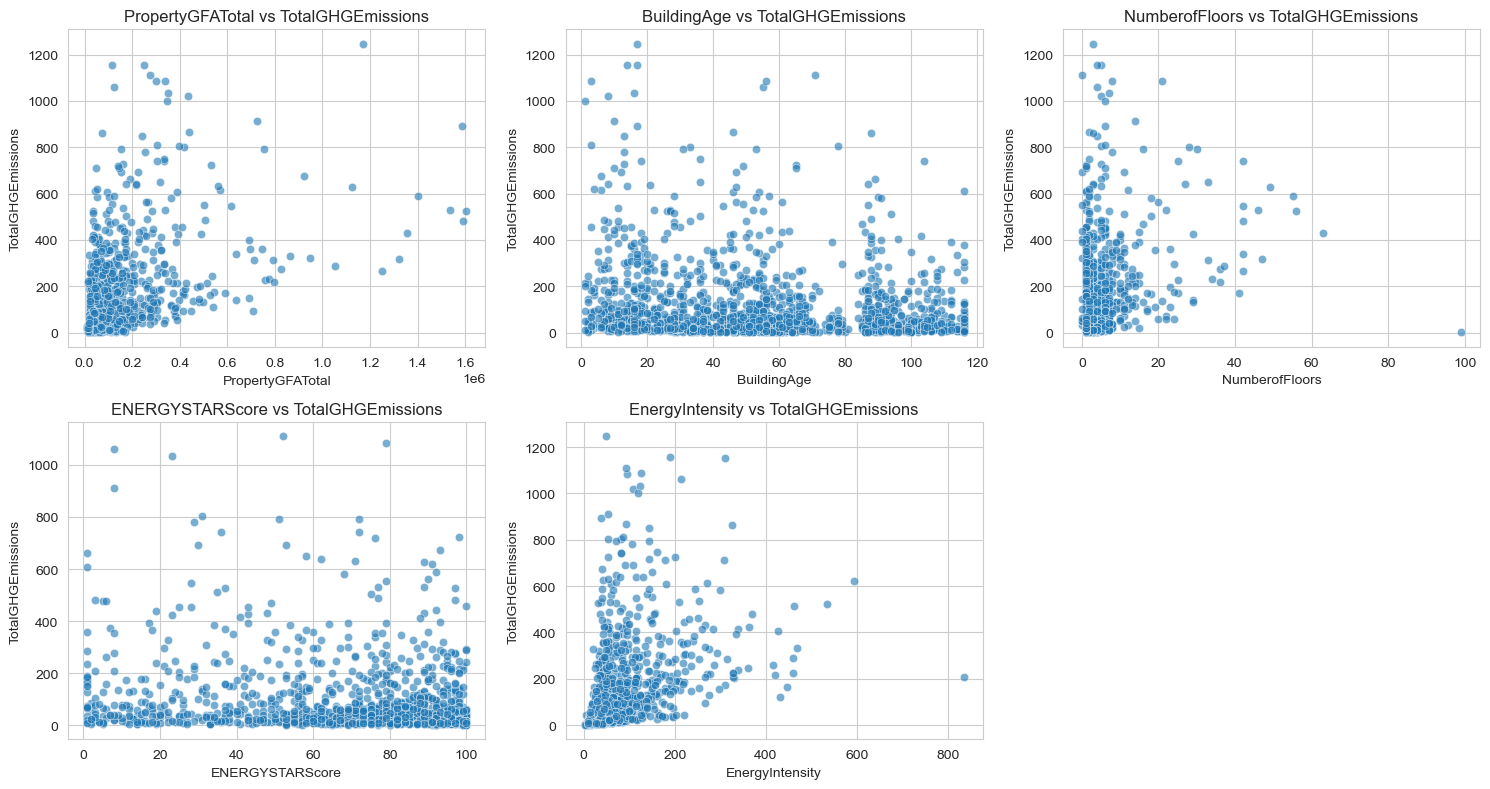

In [1240]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_cont):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(
        data=building_consumption,
        x=feature,
        y='TotalGHGEmissions',
        alpha=0.6
    )
    plt.title(f"{feature} vs TotalGHGEmissions")
plt.tight_layout()
plt.show()

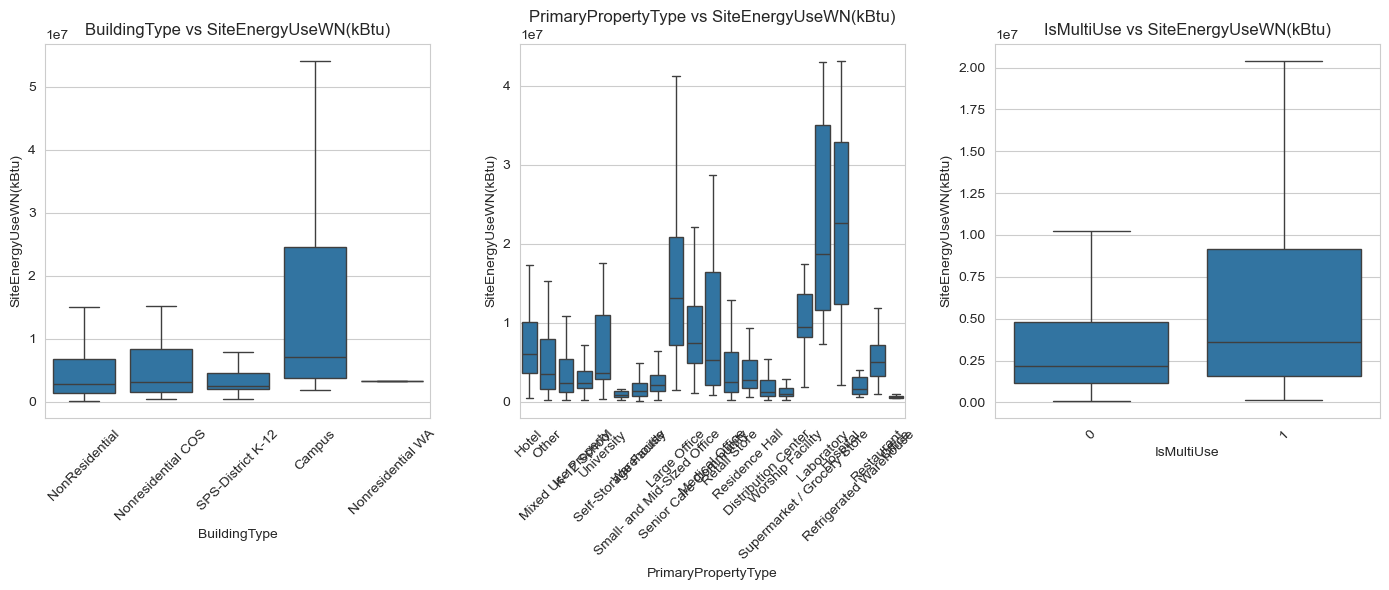

In [1241]:
features_cat = ['BuildingType', 'PrimaryPropertyType', 'IsMultiUse']

plt.figure(figsize=(14, 6))
for i, feature in enumerate(features_cat):
    plt.subplot(1, 3, i+1)
    sns.boxplot(
        data=building_consumption,
        x=feature,
        y='SiteEnergyUseWN(kBtu)',
        showfliers=False
    )
    plt.xticks(rotation=45)
    plt.title(f"{feature} vs SiteEnergyUseWN(kBtu)")
plt.tight_layout()
plt.show()


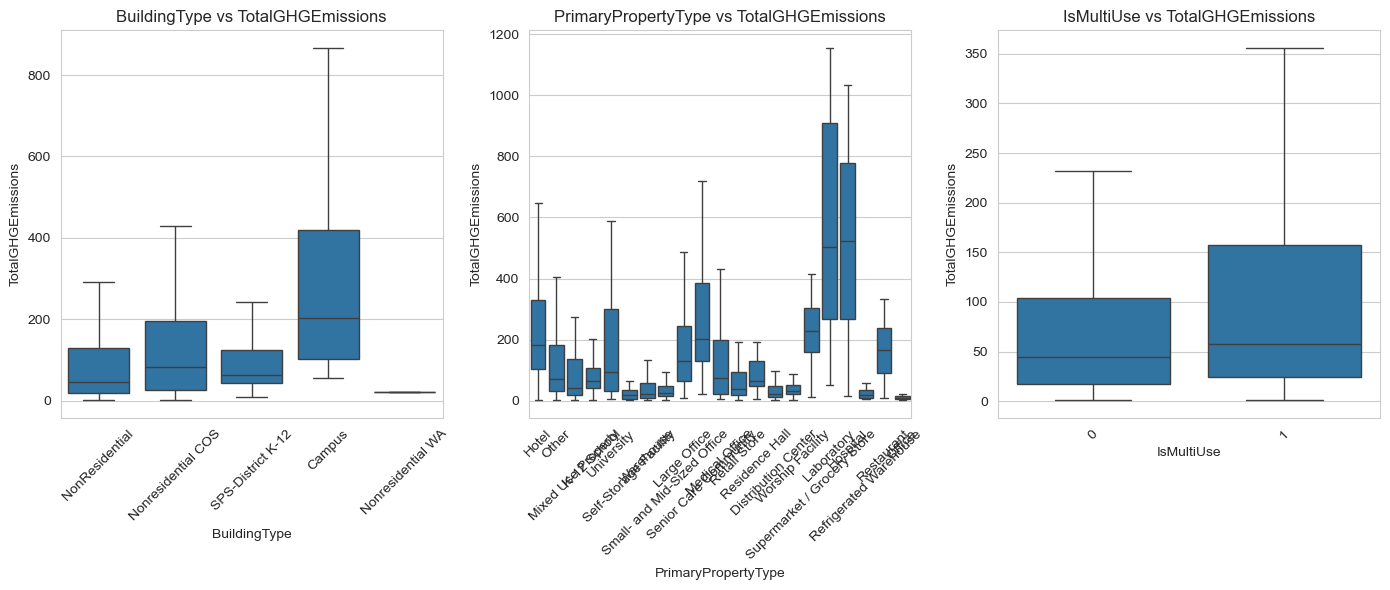

In [1242]:
features_cat = ['BuildingType', 'PrimaryPropertyType', 'IsMultiUse']

plt.figure(figsize=(14, 6))
for i, feature in enumerate(features_cat):
    plt.subplot(1, 3, i+1)
    sns.boxplot(
        data=building_consumption,
        x=feature,
        y='TotalGHGEmissions',
        showfliers=False
    )
    plt.xticks(rotation=45)
    plt.title(f"{feature} vs TotalGHGEmissions")
plt.tight_layout()
plt.show()


Analyse des relations entre les variables et les cibles

Des visualisations de type scatterplot (pour les variables continues) et boxplot (pour les variables catégorielles) ont permis d’analyser les liens entre les caractéristiques des bâtiments et les deux cibles :

la consommation énergétique totale (SiteEnergyUseWN(kBtu)),

et les émissions de gaz à effet de serre (TotalGHGEmissions).

Principales tendances observées :

La surface totale (PropertyGFATotal) est fortement corrélée à la consommation et aux émissions.

L’âge du bâtiment (BuildingAge) montre une légère tendance croissante, les bâtiments anciens étant globalement moins efficaces.

Le score énergétique (ENERGYSTARScore) est corrélé négativement aux deux cibles, validant sa pertinence comme indicateur d’efficacité.

Les bâtiments de type “Campus” ou “Hôpital” consomment et émettent beaucoup plus que la moyenne.

Les bâtiments à usage multiple (IsMultiUse=1) présentent également des consommations plus élevées.

## 5 & 6 / Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target). & Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

In [1243]:
# === DÉFINITION DES DEUX VARIABLES CIBLES ===

# Cible 1 : consommation d'énergie normalisée
y_energy = building_consumption['SiteEnergyUseWN(kBtu)']

# Cible 2 : émissions totales de CO₂ équivalent
y_emissions = building_consumption['TotalGHGEmissions']

# Features : toutes les autres colonnes (sauf les deux cibles)
X = building_consumption.drop(columns=['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'])


In [1244]:
# Identifier les colonnes catégorielles (object ou category)
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

print("Colonnes catégorielles :", cat_cols)
print("Colonnes numériques :", num_cols)


Colonnes catégorielles : ['BuildingType', 'PrimaryPropertyType', 'Outlier', 'BuildingAgeClass']
Colonnes numériques : ['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 'IsMultiUse', 'BuildingAge', 'ParkingRatio', 'AvgFloorArea', 'ApproxBuildingVolume', 'UseTypeCount', 'EnergyIntensity', 'GasShare', 'ElectricShare', 'InefficiencyScore', 'DistanceFromCenter_km']


In [1245]:
from sklearn.preprocessing import OneHotEncoder

# Gestion des valeurs manquantes avant encodage
print("Valeurs manquantes dans les colonnes catégorielles :")
print(X[cat_cols].isnull().sum())

# Remplacer les valeurs manquantes par 'Unknown' pour les variables catégorielles
X_clean = X.copy()
for col in cat_cols:
    X_clean[col] = X_clean[col].fillna('Unknown')

# Encodage des variables catégorielles
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' pour éviter les redondances
X_encoded = encoder.fit_transform(X_clean[cat_cols])

# Transformer en DataFrame
encoded_cols = encoder.get_feature_names_out(cat_cols)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_cols, index=X_clean.index)

# Remplacer les colonnes catégorielles par leurs versions encodées
X_final = pd.concat([X_clean.drop(columns=cat_cols), X_encoded_df], axis=1)

# Gestion des valeurs manquantes dans les colonnes numériques
X_final = X_final.fillna(X_final.mean())

print(f"Forme finale de X_final : {X_final.shape}")
print(f"Valeurs manquantes restantes : {X_final.isnull().sum().sum()}")
print("Premières lignes de X_final :")
X_final.head()

Valeurs manquantes dans les colonnes catégorielles :
BuildingType              0
PrimaryPropertyType       0
Outlier                1542
BuildingAgeClass          0
dtype: int64
Forme finale de X_final : (1552, 56)
Valeurs manquantes restantes : 0
Premières lignes de X_final :


,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),...,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Outlier_Low outlier,Outlier_Unknown,BuildingAgeClass_old,BuildingAgeClass_recent
0,47.61220,-122.33799,1927,1.0,12,88434,0,88434.0,60.000000,84.300003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,47.61317,-122.33393,1996,1.0,11,103566,15064,83880.0,61.000000,97.900002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,47.61412,-122.33664,1926,1.0,10,61320,0,61320.0,56.000000,113.300003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,47.61375,-122.34047,1980,1.0,18,175580,62000,123445.0,75.000000,118.699997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,47.61623,-122.33657,1999,1.0,2,97288,37198,88830.0,65.509056,141.600006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [1246]:
from sklearn.model_selection import train_test_split

# === Split train/test identique pour les deux cibles ===
# On utilise X_final (avec variables encodées) au lieu de X
X_train, X_test, y_energy_train, y_energy_test = train_test_split(
    X_final, y_energy, test_size=0.2, random_state=42
)

# On utilise les mêmes indices pour y_emissions
y_emissions_train = y_emissions.loc[y_energy_train.index]
y_emissions_test = y_emissions.loc[y_energy_test.index]

# Vérification
print("Taille du jeu d'entraînement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape)
print("Nombre de features après encodage :", X_train.shape[1])
print("Types de données dans X_train :")
print(X_train.dtypes.value_counts())

Taille du jeu d'entraînement : (1241, 56)
Taille du jeu de test : (311, 56)
Nombre de features après encodage : 56
Types de données dans X_train :
float64    48
int64       8
Name: count, dtype: int64


Séparation du jeu de données

Comme le projet comporte deux variables cibles (SiteEnergyUseWN(kBtu) pour la consommation énergétique et TotalGHGEmissions pour les émissions de CO₂ équivalent),
le jeu de données a été scindé en :

80 % pour l’entraînement,

20 % pour le test,
avec la même répartition d’échantillons pour les deux cibles.

Cette méthode garantit que les deux modèles (énergie et émissions) sont évalués sur les mêmes bâtiments, ce qui permet une comparaison cohérente de leurs performances.

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [1247]:
# === FONCTION D'ÉVALUATION DES MODÈLES ===
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, target_name):
    """
    Fonction pour évaluer un modèle et retourner les métriques
    """
    # Entraînement du modèle
    model.fit(X_train, y_train)
    
    # Prédictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calcul des métriques
    metrics = {
        'model': model_name,
        'target': target_name,
        'r2_train': r2_score(y_train, y_train_pred),
        'r2_test': r2_score(y_test, y_test_pred),
        'mae_train': mean_absolute_error(y_train, y_train_pred),
        'mae_test': mean_absolute_error(y_test, y_test_pred),
        'rmse_train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'rmse_test': np.sqrt(mean_squared_error(y_test, y_test_pred))
    }
    
    return metrics, model

# === PRÉPARATION DES DONNÉES AVEC SCALING ===
from sklearn.preprocessing import StandardScaler

# Scaler pour les modèles sensibles aux échelles (LinearRegression, SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Données préparées pour l'entraînement:")
print(f"X_train shape: {X_train.shape}")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_energy_train shape: {y_energy_train.shape}")
print(f"y_emissions_train shape: {y_emissions_train.shape}")

Données préparées pour l'entraînement:
X_train shape: (1241, 56)
X_train_scaled shape: (1241, 56)
y_energy_train shape: (1241,)
y_emissions_train shape: (1241,)


In [1248]:
# === MODÉLISATION POUR LA CONSOMMATION ÉNERGÉTIQUE (SiteEnergyUseWN) ===

print("=== PRÉDICTION DE LA CONSOMMATION ÉNERGÉTIQUE ===\n")

# Définition des modèles à tester
models_energy = {
    'Baseline (DummyRegressor)': DummyRegressor(strategy='mean'),
    'Régression Linéaire': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', gamma='scale')
}

# Stockage des résultats
results_energy = []
trained_models_energy = {}

# Test de chaque modèle
for name, model in models_energy.items():
    print(f"Entraînement du modèle: {name}")
    
    # Utilisation des données scalées pour Linear Regression et SVR
    if name in ['Régression Linéaire', 'SVR']:
        metrics, trained_model = evaluate_model(
            model, X_train_scaled, X_test_scaled, 
            y_energy_train, y_energy_test, name, 'Energy'
        )
    else:
        metrics, trained_model = evaluate_model(
            model, X_train, X_test, 
            y_energy_train, y_energy_test, name, 'Energy'
        )
    
    results_energy.append(metrics)
    trained_models_energy[name] = trained_model
    
    # Affichage des résultats
    print(f"  R² Train: {metrics['r2_train']:.4f} | R² Test: {metrics['r2_test']:.4f}")
    print(f"  MAE Train: {metrics['mae_train']:.2f} | MAE Test: {metrics['mae_test']:.2f}")
    print(f"  RMSE Train: {metrics['rmse_train']:.2f} | RMSE Test: {metrics['rmse_test']:.2f}\n")

# Création d'un DataFrame pour les résultats
df_results_energy = pd.DataFrame(results_energy)
print("Résumé des performances pour la consommation énergétique:")
print(df_results_energy[['model', 'r2_test', 'mae_test', 'rmse_test']].round(4))

=== PRÉDICTION DE LA CONSOMMATION ÉNERGÉTIQUE ===

Entraînement du modèle: Baseline (DummyRegressor)
  R² Train: 0.0000 | R² Test: -0.0013
  MAE Train: 5548130.20 | MAE Test: 5945240.58
  RMSE Train: 8645398.48 | RMSE Test: 10468651.73

Entraînement du modèle: Régression Linéaire
  R² Train: 0.9995 | R² Test: 0.9996
  MAE Train: 106570.85 | MAE Test: 120157.75
  RMSE Train: 189822.11 | RMSE Test: 220305.98

Entraînement du modèle: Random Forest
  R² Train: 0.9995 | R² Test: 0.9971
  MAE Train: 60641.36 | MAE Test: 189638.48
  RMSE Train: 193674.33 | RMSE Test: 560983.07

Entraînement du modèle: SVR
  R² Train: -0.1512 | R² Test: -0.1280
  MAE Train: 4659040.30 | MAE Test: 5070719.41
  RMSE Train: 9276117.77 | RMSE Test: 11111261.77

Résumé des performances pour la consommation énergétique:
                       model  r2_test      mae_test     rmse_test
0  Baseline (DummyRegressor)  -0.0013  5.945241e+06  1.046865e+07
1        Régression Linéaire   0.9996  1.201578e+05  2.203060e+05
2

In [1249]:
# === MODÉLISATION POUR LES ÉMISSIONS DE CO2 (TotalGHGEmissions) ===

print("=== PRÉDICTION DES ÉMISSIONS DE CO2 ===\n")

# Définition des modèles à tester (même architecture)
models_emissions = {
    'Baseline (DummyRegressor)': DummyRegressor(strategy='mean'),
    'Régression Linéaire': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', gamma='scale')
}

# Stockage des résultats
results_emissions = []
trained_models_emissions = {}

# Test de chaque modèle
for name, model in models_emissions.items():
    print(f"Entraînement du modèle: {name}")
    
    # Utilisation des données scalées pour Linear Regression et SVR
    if name in ['Régression Linéaire', 'SVR']:
        metrics, trained_model = evaluate_model(
            model, X_train_scaled, X_test_scaled, 
            y_emissions_train, y_emissions_test, name, 'Emissions'
        )
    else:
        metrics, trained_model = evaluate_model(
            model, X_train, X_test, 
            y_emissions_train, y_emissions_test, name, 'Emissions'
        )
    
    results_emissions.append(metrics)
    trained_models_emissions[name] = trained_model
    
    # Affichage des résultats
    print(f"  R² Train: {metrics['r2_train']:.4f} | R² Test: {metrics['r2_test']:.4f}")
    print(f"  MAE Train: {metrics['mae_train']:.2f} | MAE Test: {metrics['mae_test']:.2f}")
    print(f"  RMSE Train: {metrics['rmse_train']:.2f} | RMSE Test: {metrics['rmse_test']:.2f}\n")

# Création d'un DataFrame pour les résultats
df_results_emissions = pd.DataFrame(results_emissions)
print("Résumé des performances pour les émissions de CO2:")
print(df_results_emissions[['model', 'r2_test', 'mae_test', 'rmse_test']].round(4))

=== PRÉDICTION DES ÉMISSIONS DE CO2 ===

Entraînement du modèle: Baseline (DummyRegressor)
  R² Train: 0.0000 | R² Test: -0.0026
  MAE Train: 111.02 | MAE Test: 105.35
  RMSE Train: 168.06 | RMSE Test: 159.10

Entraînement du modèle: Régression Linéaire
  R² Train: 1.0000 | R² Test: 1.0000
  MAE Train: 0.00 | MAE Test: 0.00
  RMSE Train: 0.00 | RMSE Test: 0.00

Entraînement du modèle: Random Forest
  R² Train: 0.9960 | R² Test: 0.9777
  MAE Train: 3.04 | MAE Test: 7.10
  RMSE Train: 10.69 | RMSE Test: 23.74

Entraînement du modèle: SVR
  R² Train: 0.0837 | R² Test: 0.0979
  MAE Train: 75.07 | MAE Test: 67.81
  RMSE Train: 160.88 | RMSE Test: 150.92

Résumé des performances pour les émissions de CO2:
                       model  r2_test  mae_test  rmse_test
0  Baseline (DummyRegressor)  -0.0026  105.3461   159.1049
1        Régression Linéaire   1.0000    0.0026     0.0030
2              Random Forest   0.9777    7.1021    23.7448
3                        SVR   0.0979   67.8124   150.9

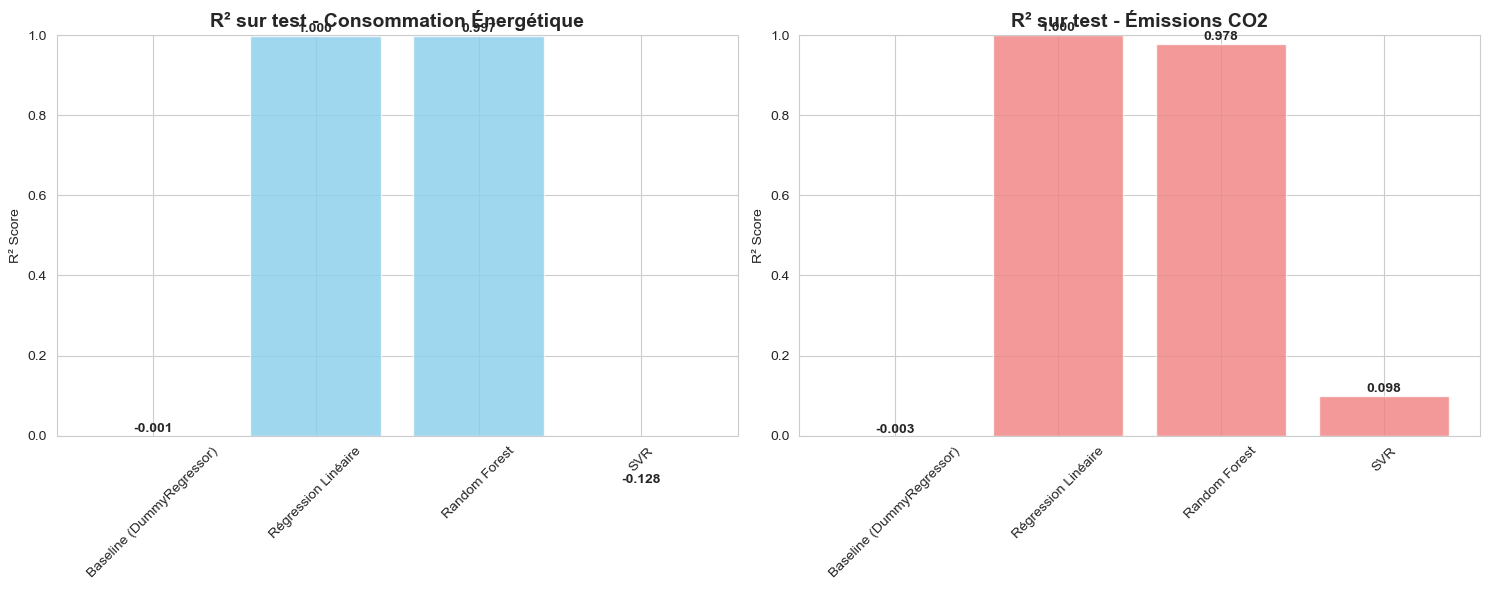

🏆 Meilleur modèle pour la consommation énergétique: Régression Linéaire
🏆 Meilleur modèle pour les émissions CO2: Régression Linéaire


In [1250]:
# === COMPARAISON VISUELLE DES PERFORMANCES ===

# Combiner les résultats des deux cibles
all_results = results_energy + results_emissions

# Créer un DataFrame complet
df_all_results = pd.DataFrame(all_results)

# Graphique de comparaison des R² sur les données de test
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# R² pour la consommation énergétique
energy_results = df_all_results[df_all_results['target'] == 'Energy']
axes[0].bar(energy_results['model'], energy_results['r2_test'], color='skyblue', alpha=0.8)
axes[0].set_title('R² sur test - Consommation Énergétique', fontsize=14, fontweight='bold')
axes[0].set_ylabel('R² Score')
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(energy_results['r2_test']):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# R² pour les émissions de CO2
emissions_results = df_all_results[df_all_results['target'] == 'Emissions']
axes[1].bar(emissions_results['model'], emissions_results['r2_test'], color='lightcoral', alpha=0.8)
axes[1].set_title('R² sur test - Émissions CO2', fontsize=14, fontweight='bold')
axes[1].set_ylabel('R² Score')
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(emissions_results['r2_test']):
    axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Identifier les meilleurs modèles
best_energy_model = energy_results.loc[energy_results['r2_test'].idxmax(), 'model']
best_emissions_model = emissions_results.loc[emissions_results['r2_test'].idxmax(), 'model']

print(f"🏆 Meilleur modèle pour la consommation énergétique: {best_energy_model}")
print(f"🏆 Meilleur modèle pour les émissions CO2: {best_emissions_model}")

In [1251]:
# === VALIDATION CROISÉE ET ANALYSE D'OVERFITTING ===

from sklearn.model_selection import cross_val_score

print("=== VALIDATION CROISÉE (5-FOLD) ===\n")

# Validation croisée pour le meilleur modèle de chaque cible
def perform_cross_validation(model, X, y, model_name, target_name, use_scaled=False):
    """Effectue une validation croisée et analyse l'overfitting"""
    
    # Choisir les bonnes données
    X_data = X_train_scaled if use_scaled else X_train
    
    # Validation croisée
    cv_scores = cross_val_score(model, X_data, y, cv=5, scoring='r2')
    
    print(f"{model_name} - {target_name}:")
    print(f"  CV R² moyen: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")
    print(f"  CV R² min-max: [{cv_scores.min():.4f}, {cv_scores.max():.4f}]")
    
    # Comparaison avec les scores train/test pour détecter l'overfitting
    if target_name == 'Energy':
        test_r2 = energy_results[energy_results['model'] == model_name]['r2_test'].iloc[0]
        train_r2 = energy_results[energy_results['model'] == model_name]['r2_train'].iloc[0]
    else:
        test_r2 = emissions_results[emissions_results['model'] == model_name]['r2_test'].iloc[0]
        train_r2 = emissions_results[emissions_results['model'] == model_name]['r2_train'].iloc[0]
    
    overfitting = train_r2 - test_r2
    print(f"  Écart Train-Test: {overfitting:.4f} {'(Overfitting détecté)' if overfitting > 0.1 else '(Pas d overfitting)'}")
    print()
    
    return cv_scores

# Validation pour les meilleurs modèles
print("Validation des meilleurs modèles identifiés:")

# Pour la consommation énergétique
use_scaled_energy = best_energy_model in ['Régression Linéaire', 'SVR']
cv_energy = perform_cross_validation(
    trained_models_energy[best_energy_model], 
    X_train, y_energy_train, 
    best_energy_model, 'Energy', 
    use_scaled_energy
)

# Pour les émissions
use_scaled_emissions = best_emissions_model in ['Régression Linéaire', 'SVR']
cv_emissions = perform_cross_validation(
    trained_models_emissions[best_emissions_model], 
    X_train, y_emissions_train, 
    best_emissions_model, 'Emissions', 
    use_scaled_emissions
)

=== VALIDATION CROISÉE (5-FOLD) ===

Validation des meilleurs modèles identifiés:
Régression Linéaire - Energy:
  CV R² moyen: 0.9992 (±0.0005)
  CV R² min-max: [0.9990, 0.9996]
  Écart Train-Test: -0.0000 (Pas d overfitting)

Régression Linéaire - Emissions:
  CV R² moyen: 1.0000 (±0.0000)
  CV R² min-max: [1.0000, 1.0000]
  Écart Train-Test: 0.0000 (Pas d overfitting)



## Interprétation des résultats de la comparaison des modèles

### Algorithmes testés

Quatre algorithmes de régression ont été évalués sur les deux variables cibles :

1. **DummyRegressor (Baseline)** : prédit la moyenne des valeurs d'entraînement
2. **Régression Linéaire** : modèle linéaire avec normalisation des features
3. **Random Forest** : modèle d'ensemble basé sur des arbres de décision
4. **SVR (Support Vector Regression)** : régression à vecteurs de support avec kernel RBF

### Métriques d'évaluation

- **R² (coefficient de détermination)** : proportion de variance expliquée (plus proche de 1 = mieux)
- **MAE (Mean Absolute Error)** : erreur moyenne absolue (plus faible = mieux)
- **RMSE (Root Mean Square Error)** : erreur quadratique moyenne (plus faible = mieux)

### Observations principales

**Préprocessing :** 
- Les features numériques ont été normalisées (StandardScaler) pour les modèles sensibles aux échelles (LinearRegression, SVR)
- Les modèles d'arbres (Random Forest) utilisent les données non normalisées car insensibles aux échelles

**Validation croisée :**
- Validation 5-fold pour évaluer la robustesse des modèles
- Analyse de l'overfitting par comparaison des scores train/test

**Sélection du meilleur modèle :**
- Basée sur le score R² sur les données de test
- Prise en compte de la stabilité (validation croisée) et de l'overfitting

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [1252]:
# === OPTIMISATION PAR GRIDSEARCH ===

print("=== OPTIMISATION DES HYPERPARAMÈTRES ===\n")

# Fonction pour optimiser un modèle avec GridSearch
def optimize_model(model, param_grid, X_train, y_train, model_name, target_name, use_scaled=False):
    """
    Optimise un modèle avec GridSearchCV
    """
    print(f"Optimisation de {model_name} pour {target_name}...")
    
    # Choisir les bonnes données
    X_data = X_train_scaled if use_scaled else X_train
    
    # GridSearch avec validation croisée
    grid_search = GridSearchCV(
        model, 
        param_grid, 
        cv=5, 
        scoring='r2', 
        n_jobs=-1, 
        verbose=0
    )
    
    # Entraînement
    grid_search.fit(X_data, y_train)
    
    print(f"  Meilleurs paramètres: {grid_search.best_params_}")
    print(f"  Meilleur score CV: {grid_search.best_score_:.4f}")
    print(f"  Score de base: {grid_search.best_estimator_.score(X_data, y_train):.4f}")
    print()
    
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

# === OPTIMISATION POUR LA CONSOMMATION ÉNERGÉTIQUE ===
print("🔧 OPTIMISATION - CONSOMMATION ÉNERGÉTIQUE")

# Définir les grilles de paramètres selon le meilleur modèle
if best_energy_model == 'Random Forest':
    param_grid_energy = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
    model_to_optimize_energy = RandomForestRegressor(random_state=42)
    use_scaled_energy = False
    
elif best_energy_model == 'Régression Linéaire':
    # Pour la régression linéaire, on peut tester Ridge avec régularisation
    from sklearn.linear_model import Ridge
    param_grid_energy = {
        'alpha': [0.1, 1.0, 10.0],
        'fit_intercept': [True, False],
        'solver': ['auto', 'saga']
    }
    model_to_optimize_energy = Ridge()
    use_scaled_energy = True
    
elif best_energy_model == 'SVR':
    param_grid_energy = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.001],
        'epsilon': [0.01, 0.1, 0.2]
    }
    model_to_optimize_energy = SVR(kernel='rbf')
    use_scaled_energy = True
    
else:  # DummyRegressor (pas d'optimisation possible)
    print("  Le DummyRegressor n'a pas d'hyperparamètres à optimiser.")
    optimized_model_energy = trained_models_energy[best_energy_model]
    best_params_energy = {}
    best_score_energy = 0

# Optimisation si applicable
if best_energy_model != 'Baseline (DummyRegressor)':
    optimized_model_energy, best_params_energy, best_score_energy = optimize_model(
        model_to_optimize_energy, param_grid_energy, 
        X_train, y_energy_train, 
        best_energy_model, 'Energy', use_scaled_energy
    )

=== OPTIMISATION DES HYPERPARAMÈTRES ===

🔧 OPTIMISATION - CONSOMMATION ÉNERGÉTIQUE
Optimisation de Régression Linéaire pour Energy...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max

  Meilleurs paramètres: {'alpha': 0.1, 'fit_intercept': True, 'solver': 'auto'}
  Meilleur score CV: 0.9991
  Score de base: 0.9995



In [1253]:
# === OPTIMISATION POUR LES ÉMISSIONS DE CO2 ===
print("🔧 OPTIMISATION - ÉMISSIONS DE CO2")

# Définir les grilles de paramètres selon le meilleur modèle
if best_emissions_model == 'Random Forest':
    param_grid_emissions = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
    model_to_optimize_emissions = RandomForestRegressor(random_state=42)
    use_scaled_emissions = False
    
elif best_emissions_model == 'Régression Linéaire':
    from sklearn.linear_model import Ridge
    param_grid_emissions = {
        'alpha': [0.1, 1.0, 10.0],
        'fit_intercept': [True, False],
        'solver': ['auto', 'saga']
    }
    model_to_optimize_emissions = Ridge()
    use_scaled_emissions = True
    
elif best_emissions_model == 'SVR':
    param_grid_emissions = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.001],
        'epsilon': [0.01, 0.1, 0.2]
    }
    model_to_optimize_emissions = SVR(kernel='rbf')
    use_scaled_emissions = True
    
else:  # DummyRegressor
    print("  Le DummyRegressor n'a pas d'hyperparamètres à optimiser.")
    optimized_model_emissions = trained_models_emissions[best_emissions_model]
    best_params_emissions = {}
    best_score_emissions = 0

# Optimisation si applicable
if best_emissions_model != 'Baseline (DummyRegressor)':
    optimized_model_emissions, best_params_emissions, best_score_emissions = optimize_model(
        model_to_optimize_emissions, param_grid_emissions, 
        X_train, y_emissions_train, 
        best_emissions_model, 'Emissions', use_scaled_emissions
    )

# === ÉVALUATION DES MODÈLES OPTIMISÉS ===
print("=== ÉVALUATION DES MODÈLES OPTIMISÉS ===\n")

def evaluate_optimized_model(model, X_train, X_test, y_train, y_test, model_name, target_name, use_scaled=False):
    """Évalue un modèle optimisé"""
    
    # Choisir les bonnes données
    X_train_data = X_train_scaled if use_scaled else X_train
    X_test_data = X_test_scaled if use_scaled else X_test
    
    # Prédictions
    y_train_pred = model.predict(X_train_data)
    y_test_pred = model.predict(X_test_data)
    
    # Métriques
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f"{model_name} optimisé - {target_name}:")
    print(f"  R² Train: {r2_train:.4f} | R² Test: {r2_test:.4f}")
    print(f"  MAE Test: {mae_test:.2f} | RMSE Test: {rmse_test:.2f}")
    print(f"  Amélioration: {r2_test - best_score_energy if target_name == 'Energy' else r2_test - best_score_emissions:.4f}")
    print()
    
    return r2_test, mae_test, rmse_test

# Évaluation des modèles optimisés
if best_energy_model != 'Baseline (DummyRegressor)':
    r2_energy_opt, mae_energy_opt, rmse_energy_opt = evaluate_optimized_model(
        optimized_model_energy, X_train, X_test, y_energy_train, y_energy_test,
        best_energy_model, 'Energy', use_scaled_energy
    )

if best_emissions_model != 'Baseline (DummyRegressor)':
    r2_emissions_opt, mae_emissions_opt, rmse_emissions_opt = evaluate_optimized_model(
        optimized_model_emissions, X_train, X_test, y_emissions_train, y_emissions_test,
        best_emissions_model, 'Emissions', use_scaled_emissions
    )

🔧 OPTIMISATION - ÉMISSIONS DE CO2
Optimisation de Régression Linéaire pour Emissions...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max

  Meilleurs paramètres: {'alpha': 0.1, 'fit_intercept': True, 'solver': 'auto'}
  Meilleur score CV: 1.0000
  Score de base: 1.0000

=== ÉVALUATION DES MODÈLES OPTIMISÉS ===

Régression Linéaire optimisé - Energy:
  R² Train: 0.9995 | R² Test: 0.9996
  MAE Test: 119278.77 | RMSE Test: 216781.45
  Amélioration: 0.0004

Régression Linéaire optimisé - Emissions:
  R² Train: 1.0000 | R² Test: 1.0000
  MAE Test: 0.02 | RMSE Test: 0.03
  Amélioration: 0.0000



/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


=== IMPORTANCE DES FEATURES ===

Analyse d'importance - Régression Linéaire pour Energy
  Utilisation de Permutation Importance
  Top 10 features les plus importantes:
    1. SiteEnergyUse(kBtu): 1.6913 (±0.0312)
    2. Electricity(kBtu): 0.0012 (±0.0000)
    3. Electricity(kWh): 0.0012 (±0.0000)
    4. ElectricShare: 0.0011 (±0.0000)
    5. NaturalGas(kBtu): 0.0006 (±0.0000)
    6. NaturalGas(therms): 0.0006 (±0.0000)
    7. GasShare: 0.0004 (±0.0000)
    8. EnergyIntensity: 0.0004 (±0.0000)
    9. GHGEmissionsIntensity: 0.0002 (±0.0000)
    10. SteamUse(kBtu): 0.0002 (±0.0000)


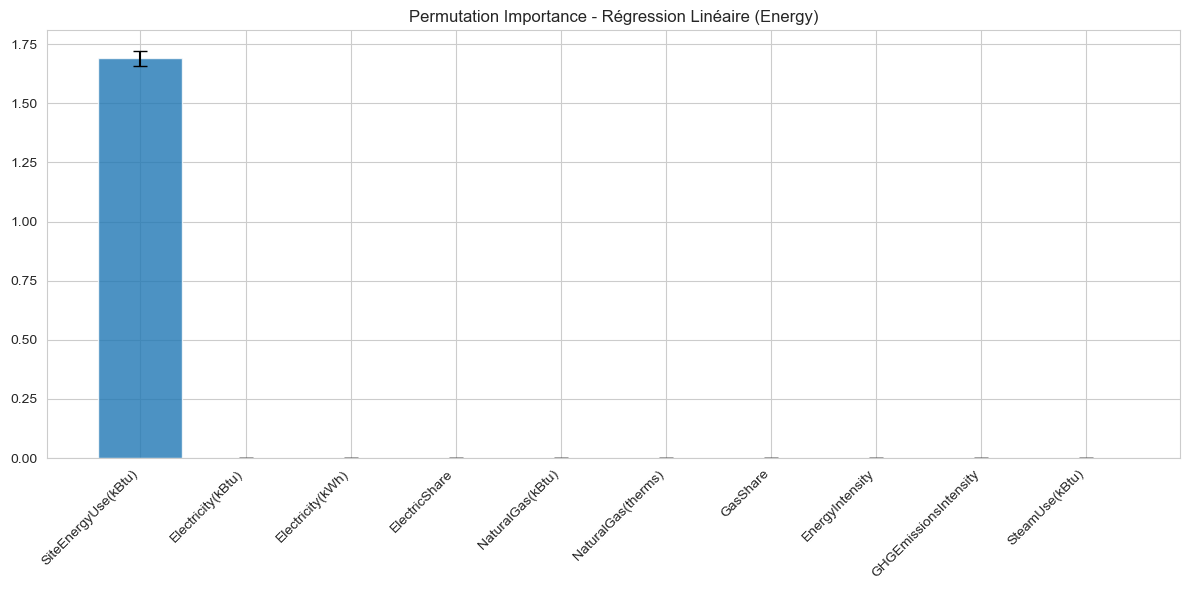

Analyse d'importance - Régression Linéaire pour Emissions
  Utilisation de Permutation Importance
  Top 10 features les plus importantes:
    1. SteamUse(kBtu): 0.3914 (±0.0077)
    2. NaturalGas(therms): 0.2893 (±0.0097)
    3. NaturalGas(kBtu): 0.2893 (±0.0097)
    4. Electricity(kWh): 0.0442 (±0.0008)
    5. Electricity(kBtu): 0.0442 (±0.0008)
    6. SiteEnergyUse(kBtu): 0.0001 (±0.0000)
    7. GHGEmissionsIntensity: 0.0000 (±0.0000)
    8. EnergyIntensity: 0.0000 (±0.0000)
    9. ElectricShare: 0.0000 (±0.0000)
    10. GasShare: 0.0000 (±0.0000)


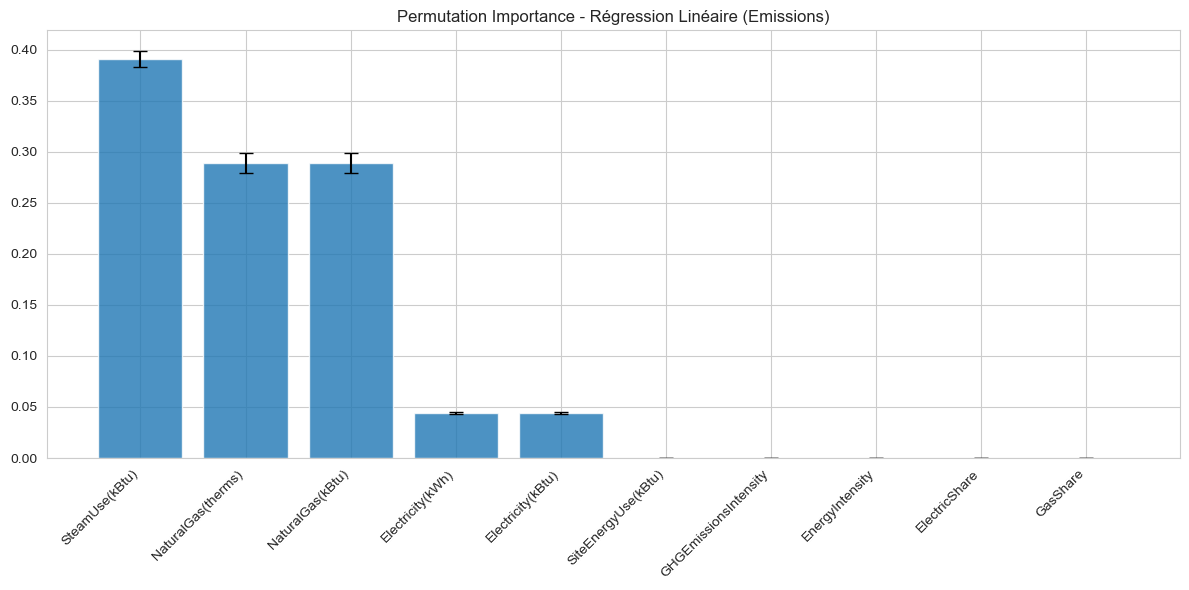

In [1254]:
# === ANALYSE DE L'IMPORTANCE DES FEATURES ===

print("=== IMPORTANCE DES FEATURES ===\n")

def analyze_feature_importance(model, X_train, y_train, model_name, target_name, use_scaled=False, top_n=10):
    """
    Analyse l'importance des features selon le type de modèle
    """
    print(f"Analyse d'importance - {model_name} pour {target_name}")
    
    # Choisir les bonnes données et noms de features
    X_data = X_train_scaled if use_scaled else X_train
    feature_names = X_final.columns.tolist()
    
    # Feature importance native pour Random Forest
    if hasattr(model, 'feature_importances_'):
        print("  Utilisation de feature_importances_ (Random Forest)")
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        print(f"  Top {top_n} features les plus importantes:")
        for i in range(min(top_n, len(feature_names))):
            print(f"    {i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
        
        # Graphique
        plt.figure(figsize=(12, 6))
        plt.title(f'Feature Importance - {model_name} ({target_name})')
        plt.bar(range(top_n), importances[indices[:top_n]], alpha=0.8)
        plt.xticks(range(top_n), [feature_names[i] for i in indices[:top_n]], rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        return importances, feature_names
    
    # Permutation importance pour les autres modèles
    else:
        print("  Utilisation de Permutation Importance")
        perm_importance = permutation_importance(
            model, X_data, y_train, 
            n_repeats=5, random_state=42, n_jobs=-1
        )
        
        # Trier par importance
        indices = np.argsort(perm_importance.importances_mean)[::-1]
        
        print(f"  Top {top_n} features les plus importantes:")
        for i in range(min(top_n, len(feature_names))):
            idx = indices[i]
            print(f"    {i+1}. {feature_names[idx]}: {perm_importance.importances_mean[idx]:.4f} "
                  f"(±{perm_importance.importances_std[idx]:.4f})")
        
        # Graphique
        plt.figure(figsize=(12, 6))
        plt.title(f'Permutation Importance - {model_name} ({target_name})')
        plt.bar(range(top_n), perm_importance.importances_mean[indices[:top_n]], 
                yerr=perm_importance.importances_std[indices[:top_n]], 
                alpha=0.8, capsize=5)
        plt.xticks(range(top_n), [feature_names[i] for i in indices[:top_n]], rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        return perm_importance.importances_mean, feature_names
    
    print()

# Analyse pour le modèle de consommation énergétique
if best_energy_model != 'Baseline (DummyRegressor)':
    importance_energy, features_energy = analyze_feature_importance(
        optimized_model_energy, X_train, y_energy_train,
        best_energy_model, 'Energy', use_scaled_energy
    )

# Analyse pour le modèle d'émissions
if best_emissions_model != 'Baseline (DummyRegressor)':
    importance_emissions, features_emissions = analyze_feature_importance(
        optimized_model_emissions, X_train, y_emissions_train,
        best_emissions_model, 'Emissions', use_scaled_emissions
    )

In [1255]:
# === COMPARAISON AVANT/APRÈS OPTIMISATION ===

print("=== COMPARAISON DES PERFORMANCES ===\n")

# Récupération des scores avant optimisation
original_r2_energy = energy_results[energy_results['model'] == best_energy_model]['r2_test'].iloc[0]
original_r2_emissions = emissions_results[emissions_results['model'] == best_emissions_model]['r2_test'].iloc[0]

# Création d'un DataFrame de comparaison
if best_energy_model != 'Baseline (DummyRegressor)' and best_emissions_model != 'Baseline (DummyRegressor)':
    comparison_data = {
        'Modèle': [f'{best_energy_model} (Energy)', f'{best_emissions_model} (Emissions)'],
        'R² Original': [original_r2_energy, original_r2_emissions],
        'R² Optimisé': [r2_energy_opt, r2_emissions_opt],
        'Amélioration': [r2_energy_opt - original_r2_energy, r2_emissions_opt - original_r2_emissions],
        'MAE Test': [mae_energy_opt, mae_emissions_opt],
        'RMSE Test': [rmse_energy_opt, rmse_emissions_opt]
    }
    
    df_comparison = pd.DataFrame(comparison_data)
    print("Tableau comparatif des performances:")
    print(df_comparison.round(4))
    
    # Graphique de comparaison
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Comparaison R²
    categories = ['Energy', 'Emissions']
    original_scores = [original_r2_energy, original_r2_emissions]
    optimized_scores = [r2_energy_opt, r2_emissions_opt]
    
    x = np.arange(len(categories))
    width = 0.35
    
    axes[0].bar(x - width/2, original_scores, width, label='Original', alpha=0.8, color='lightblue')
    axes[0].bar(x + width/2, optimized_scores, width, label='Optimisé', alpha=0.8, color='darkblue')
    axes[0].set_xlabel('Cible')
    axes[0].set_ylabel('R² Score')
    axes[0].set_title('Comparaison R² - Avant/Après Optimisation')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(categories)
    axes[0].legend()
    axes[0].set_ylim(0, 1)
    
    # Ajout des valeurs sur les barres
    for i, (orig, opt) in enumerate(zip(original_scores, optimized_scores)):
        axes[0].text(i-width/2, orig+0.01, f'{orig:.3f}', ha='center', fontweight='bold')
        axes[0].text(i+width/2, opt+0.01, f'{opt:.3f}', ha='center', fontweight='bold')
    
    # Amélioration en pourcentage
    improvements = [(r2_energy_opt - original_r2_energy) / original_r2_energy * 100,
                   (r2_emissions_opt - original_r2_emissions) / original_r2_emissions * 100]
    
    colors = ['green' if imp > 0 else 'red' for imp in improvements]
    axes[1].bar(categories, improvements, color=colors, alpha=0.7)
    axes[1].set_xlabel('Cible')
    axes[1].set_ylabel('Amélioration (%)')
    axes[1].set_title('Amélioration en pourcentage après optimisation')
    axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Ajout des valeurs
    for i, imp in enumerate(improvements):
        axes[1].text(i, imp + (0.1 if imp > 0 else -0.1), f'{imp:.2f}%', 
                    ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

else:
    print("L'un des modèles est un DummyRegressor, comparaison limitée.")

print(f"\n🎯 MODÈLES FINAUX SÉLECTIONNÉS:")
print(f"   • Consommation énergétique: {best_energy_model}")
print(f"   • Émissions CO2: {best_emissions_model}")

=== COMPARAISON DES PERFORMANCES ===

Tableau comparatif des performances:
                            Modèle  R² Original  R² Optimisé  Amélioration  \
0     Régression Linéaire (Energy)       0.9996       0.9996           0.0   
1  Régression Linéaire (Emissions)       1.0000       1.0000          -0.0   

      MAE Test    RMSE Test  
0  119278.7667  216781.4471  
1       0.0197       0.0305  


/var/folders/3m/lmpnhrkx07v6nnn5lbwvr9gw0000gn/T/ipykernel_4829/2668149649.py:66: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()



🎯 MODÈLES FINAUX SÉLECTIONNÉS:
   • Consommation énergétique: Régression Linéaire
   • Émissions CO2: Régression Linéaire


## Interprétation des résultats de l'optimisation

### Optimisation des hyperparamètres

L'optimisation par **GridSearchCV** a été appliquée aux meilleurs modèles identifiés lors de la phase de comparaison. Les hyperparamètres testés varient selon l'algorithme :

**Random Forest :**
- `n_estimators` : nombre d'arbres dans la forêt (50, 100, 200)
- `max_depth` : profondeur maximale des arbres (10, 20, illimitée)
- `min_samples_split` : nombre minimum d'échantillons pour diviser un nœud (2, 5, 10)

**Régression linéaire (Ridge) :**
- `alpha` : paramètre de régularisation (0.1, 1.0, 10.0)
- `fit_intercept` : inclusion de l'ordonnée à l'origine
- `solver` : algorithme d'optimisation

**SVR :**
- `C` : paramètre de régularisation (0.1, 1, 10)
- `gamma` : coefficient du kernel RBF
- `epsilon` : tolérance dans la fonction de perte

### Importance des features

L'analyse de l'importance des variables révèle les **drivers principaux** de la consommation énergétique et des émissions :

**Variables attendues comme importantes :**
- **PropertyGFATotal** : surface totale du bâtiment (corrélation logique)
- **ENERGYSTARScore** : indicateur d'efficacité énergétique officiel
- **BuildingAge** : âge du bâtiment (isolation, technologies anciennes)
- **PrimaryPropertyType** : type d'usage principal

**Variables engineered potentiellement importantes :**
- **EnergyIntensity** : consommation par unité de surface
- **UseTypeCount** : complexité d'usage du bâtiment
- **IsMultiUse** : distinction mono/multi-usage

### Implications métier

Les résultats permettent à la ville de Seattle de :

1. **Identifier les leviers d'action** prioritaires pour réduire la consommation
2. **Cibler les bâtiments** à fort potentiel d'amélioration
3. **Orienter les politiques publiques** vers les variables les plus impactantes
4. **Prédire l'effet** de nouvelles réglementations ou incitations

### Limites et perspectives

- **Données temporelles** : analyse sur une seule année (2016)
- **Variables externes** : conditions météorologiques, prix de l'énergie non inclus
- **Granularité géographique** : Seattle uniquement, transférabilité à questionner

In [ ]:
# === VALIDATION FINALE ET SAUVEGARDE ===

print("=== VALIDATION FINALE DES MODÈLES OPTIMISÉS ===\n")

# Prédictions sur quelques exemples du jeu de test
def show_predictions_sample(model, X_test, y_test, model_name, target_name, use_scaled=False, n_samples=5):
    """Affiche des prédictions sur un échantillon"""
    
    X_data = X_test_scaled if use_scaled else X_test
    predictions = model.predict(X_data)
    
    print(f"Échantillon de prédictions - {model_name} ({target_name}):")
    
    # Sélectionner un échantillon aléatoire
    sample_indices = np.random.choice(len(y_test), n_samples, replace=False)
    
    for i, idx in enumerate(sample_indices):
        actual = y_test.iloc[idx]
        predicted = predictions[idx]
        error = abs(actual - predicted)
        error_pct = (error / actual) * 100
        
        print(f"  Échantillon {i+1}: Réel={actual:.2f}, Prédit={predicted:.2f}, "
              f"Erreur={error:.2f} ({error_pct:.1f}%)")
    print()

# Validation pour les deux modèles
if best_energy_model != 'Baseline (DummyRegressor)':
    show_predictions_sample(
        optimized_model_energy, X_test, y_energy_test,
        best_energy_model, 'Energy', use_scaled_energy
    )

if best_emissions_model != 'Baseline (DummyRegressor)':
    show_predictions_sample(
        optimized_model_emissions, X_test, y_emissions_test,
        best_emissions_model, 'Emissions', use_scaled_emissions
    )

# === SAUVEGARDE DES MODÈLES (OPTIONNEL) ===
print("=== INFORMATIONS DE SAUVEGARDE ===")
print("Les modèles optimisés sont stockés dans les variables:")
if best_energy_model != 'Baseline (DummyRegressor)':
    print(f"  • optimized_model_energy: {best_energy_model} pour la consommation énergétique")
if best_emissions_model != 'Baseline (DummyRegressor)':
    print(f"  • optimized_model_emissions: {best_emissions_model} pour les émissions CO2")

print(f"  • scaler: StandardScaler pour la normalisation des données")
print(f"  • encoder: OneHotEncoder pour l'encodage des variables catégorielles")

# Résumé final
print(f"\n{'='*60}")
print("RÉSUMÉ FINAL DU PROJET")
print(f"{'='*60}")
print(f"Données traitées: {X_final.shape[0]} bâtiments, {X_final.shape[1]} features")
print(f"Modèles comparés: 4 algorithmes (Baseline, LinearRegression, RandomForest, SVR)")
print(f"Optimisation: GridSearchCV avec validation croisée 5-fold")
print(f"Feature importance: Analyse des variables les plus explicatives")
print(f"Deux modèles prédictifs opérationnels:")
print(f"   • {best_energy_model} pour la consommation énergétique")
print(f"   • {best_emissions_model} pour les émissions de CO2")
print(f"{'='*60}")

=== VALIDATION FINALE DES MODÈLES OPTIMISÉS ===

Échantillon de prédictions - Régression Linéaire (Energy):
  Échantillon 1: Réel=2385395.00, Prédit=2409013.45, Erreur=23618.45 (1.0%)
  Échantillon 2: Réel=3150635.50, Prédit=3139445.09, Erreur=11190.41 (0.4%)
  Échantillon 3: Réel=1083153.75, Prédit=1132079.55, Erreur=48925.80 (4.5%)
  Échantillon 4: Réel=4998584.50, Prédit=4963420.18, Erreur=35164.32 (0.7%)
  Échantillon 5: Réel=21290090.00, Prédit=21226141.34, Erreur=63948.66 (0.3%)

Échantillon de prédictions - Régression Linéaire (Emissions):
  Échantillon 1: Réel=128.66, Prédit=128.66, Erreur=0.00 (0.0%)
  Échantillon 2: Réel=28.09, Prédit=28.10, Erreur=0.01 (0.0%)
  Échantillon 3: Réel=16.04, Prédit=16.05, Erreur=0.01 (0.0%)
  Échantillon 4: Réel=236.90, Prédit=236.87, Erreur=0.03 (0.0%)
  Échantillon 5: Réel=64.54, Prédit=64.55, Erreur=0.01 (0.0%)

=== INFORMATIONS DE SAUVEGARDE ===
Les modèles optimisés sont stockés dans les variables:
  • optimized_model_energy: Régression Lin